# Why Feature Scaling is important?
When difference is much the smaller value will loose its importance especially when we use algo like KNN.
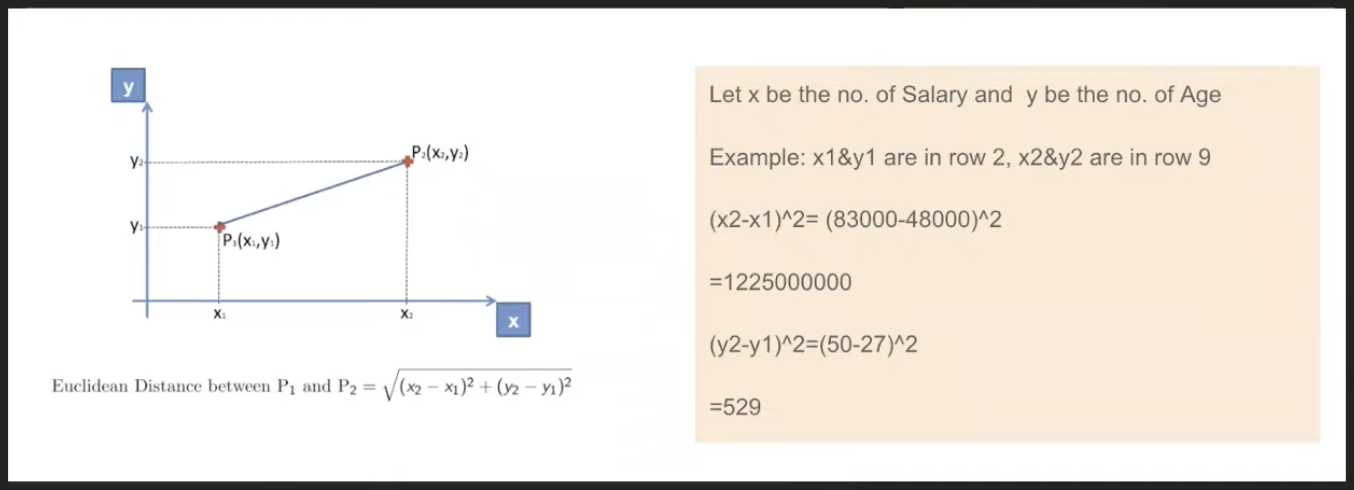

There are two types of feature scaling as follows:
- Standardisation or Z-Score Normalisation
- Normalisation
  1. min max scaler
  2. Robust scaler

## Standardization
 Xsi=(Xi−μ)/σ 
 
 The characterstics of the Xsi will be μ = 0 and σ = 1.

## Geometric Intution

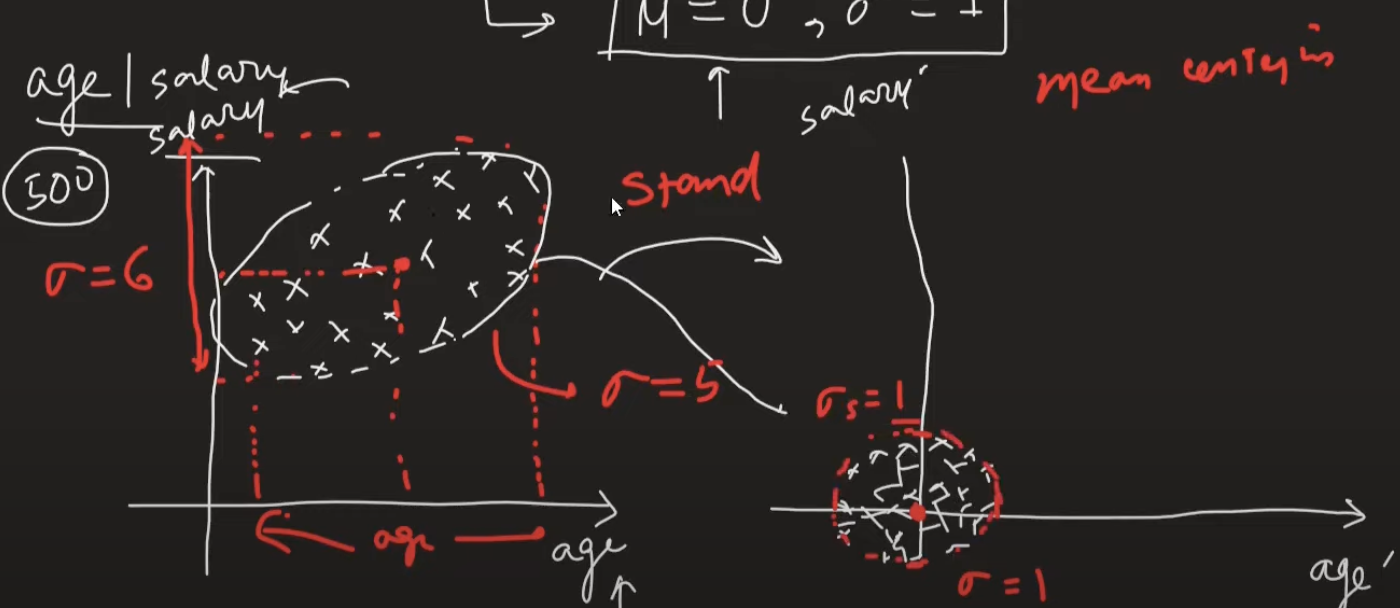

## Example 

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("Social_Network_Ads.csv")

In [94]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Removing Irrelevant columns

In [95]:
df = df.iloc[:,2:]

In [96]:
df.sample(5)

,Age,EstimatedSalary,Purchased
242,50,88000,1
318,45,32000,1
203,41,71000,0
84,30,62000,0
12,20,86000,0


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop ('Purchased', axis=1),
df ['Purchased'], test_size=0.3, random_state=0)


- random_state=0: This parameter sets the random seed for reproducibility. It ensures that if you run the code again, you'll get the same train-test split.
-  axis=1 is used to specify that the operation (dropping in this case) should be applied along columns, and it helps in dropping the specified column from the DataFrame.

In [48]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

## StandardScaler

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Learning the paramters like mean and standard deviation
scaler.fit(X_train)

# Transform train and test data using the above formula
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Showing paramters calculated
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

Major problem with this function is that it takes the data frame but return in numpy array

In [65]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [53]:
# Converting the Numpy in to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled, columns = X_test.columns)

In [54]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [55]:
# The mean value for both the column is same as above
X_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.864286,69807.142857
std,10.218201,34641.201654
min,18.000000,15000.000000
25%,30.000000,43000.000000
50%,37.000000,70500.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [56]:
# Mean and Standard deviation is 0 and 1 respectively.
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,3.489272e-17,6.344132e-17
std,1.001791e+00,1.001791e+00
min,-1.947491e+00,-1.584970e+00
25%,-7.710131e-01,-7.752370e-01
50%,-8.473441e-02,2.003677e-02
75%,7.976239e-01,5.261201e-01
max,2.170181e+00,2.319101e+00


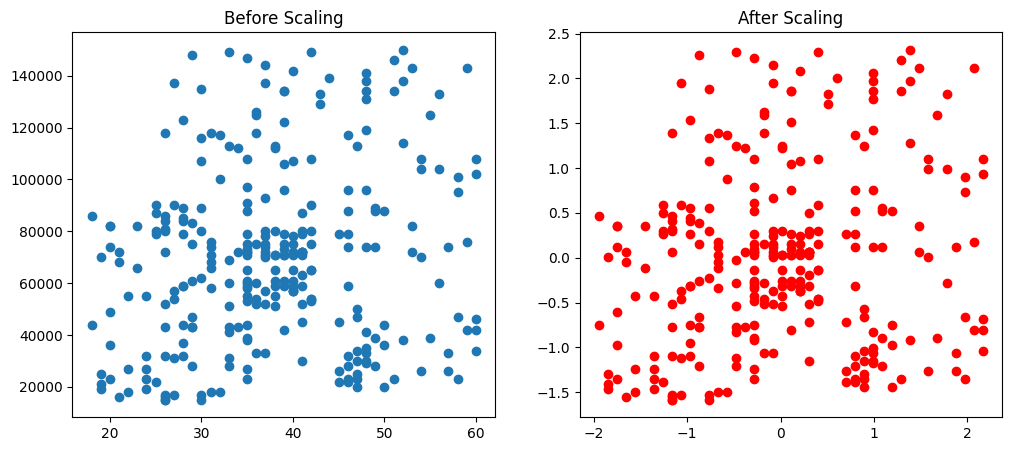

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

# Plotting PDF

Plotting the PDF plot to understand the benefit of scaling

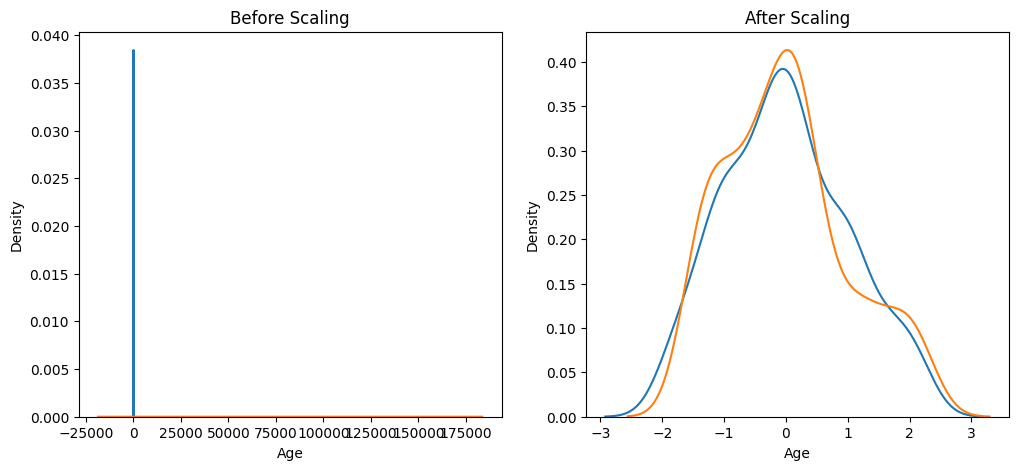

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols = 2 , figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax= ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax= ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"], ax= ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax= ax2)
plt.show()

# Impact on individual columns
If we observe closing the distribution is the same, The scale is the only thing which changed.

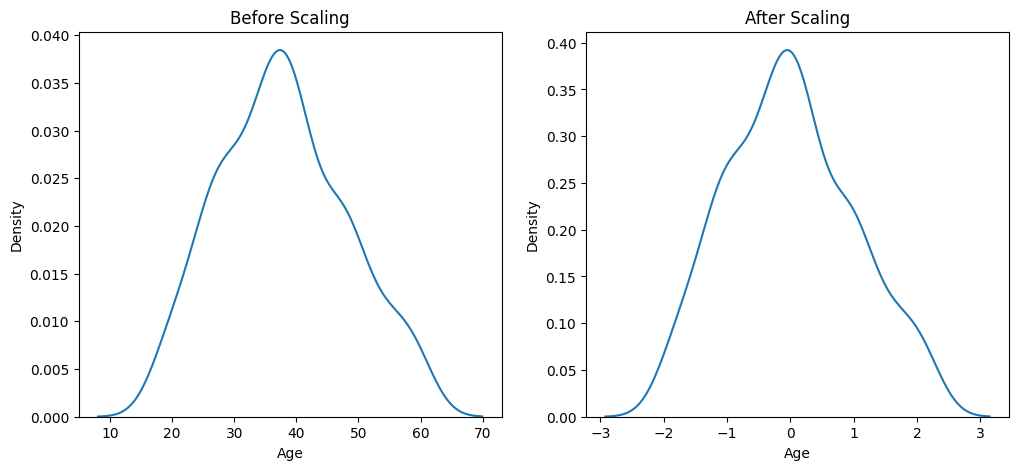

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols = 2 , figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax= ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Age"], ax= ax2)

plt.show()

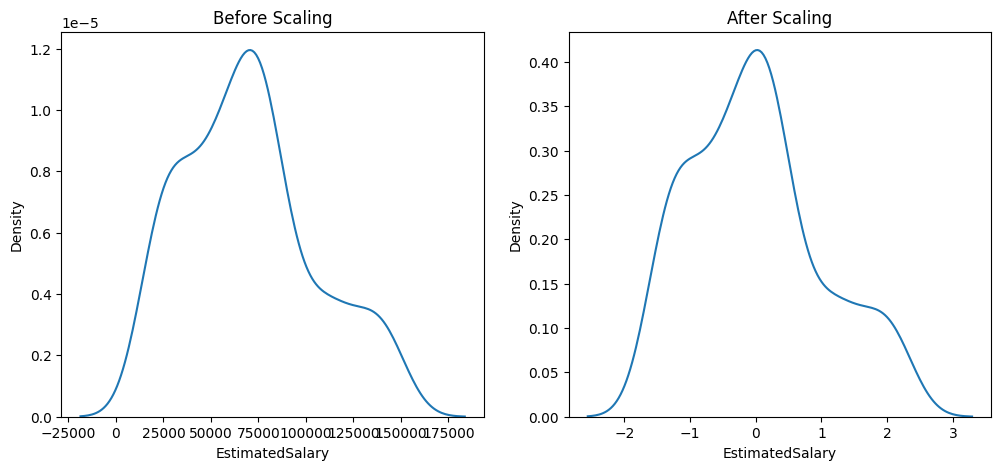

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols = 2 , figsize = (12, 5))

ax1.set_title("Before Scaling")

sns.kdeplot(X_train["EstimatedSalary"], ax= ax1)

ax2.set_title("After Scaling")

sns.kdeplot(X_train_scaled["EstimatedSalary"], ax= ax2)
plt.show()

# Why Scaling important?

## Algorithm where scaling plays significant role

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [66]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [77]:
X_test_scaled.shape

(120, 2)

In [78]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

/Users/vinaymittal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [80]:
from sklearn.metrics import accuracy_score

print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


## Algorithm where scaling plays significant role

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dc = DecisionTreeClassifier()
dc_scaled = DecisionTreeClassifier()

In [84]:
dc.fit(X_train, y_train)
dc_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [85]:
y_pred = dc.predict(X_test)
y_pred_scaled = dc_scaled.predict(X_test_scaled)

In [86]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.875


# Impact of Outlier

In [102]:
df1 = pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})
df = pd.concat([df1, df], ignore_index = True)

In [103]:
df

,Age,EstimatedSalary,Purchased
0,5,1000,0
1,90,250000,1
2,95,350000,1
3,19,19000,0
4,35,20000,0
...,...,...,...
398,46,41000,1
399,51,23000,1
400,50,20000,1
401,36,33000,0


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                       df['Purchased'], test_size = 0.3, random_state = 0)



In [109]:
X_train

,Age,EstimatedSalary
179,35,47000
219,49,65000
302,46,117000
49,25,79000
241,46,82000
...,...,...
323,52,138000
192,28,32000
117,42,80000
47,28,84000


In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [114]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

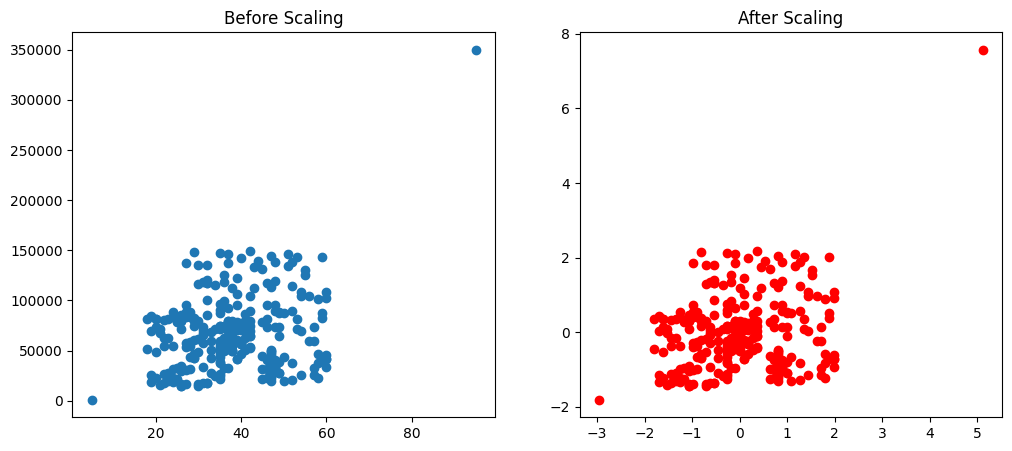

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

The impact of outlier does not decrease so even if we scale the data, the impact of outlier will always remain the same.

# When to use StandardScaler?

Basic understanding is whenever we calculate distance in the algo. We need to use standardscaler to bring down all the column on same scale. SO that impact of small values is not reduced.
- logistic Regression
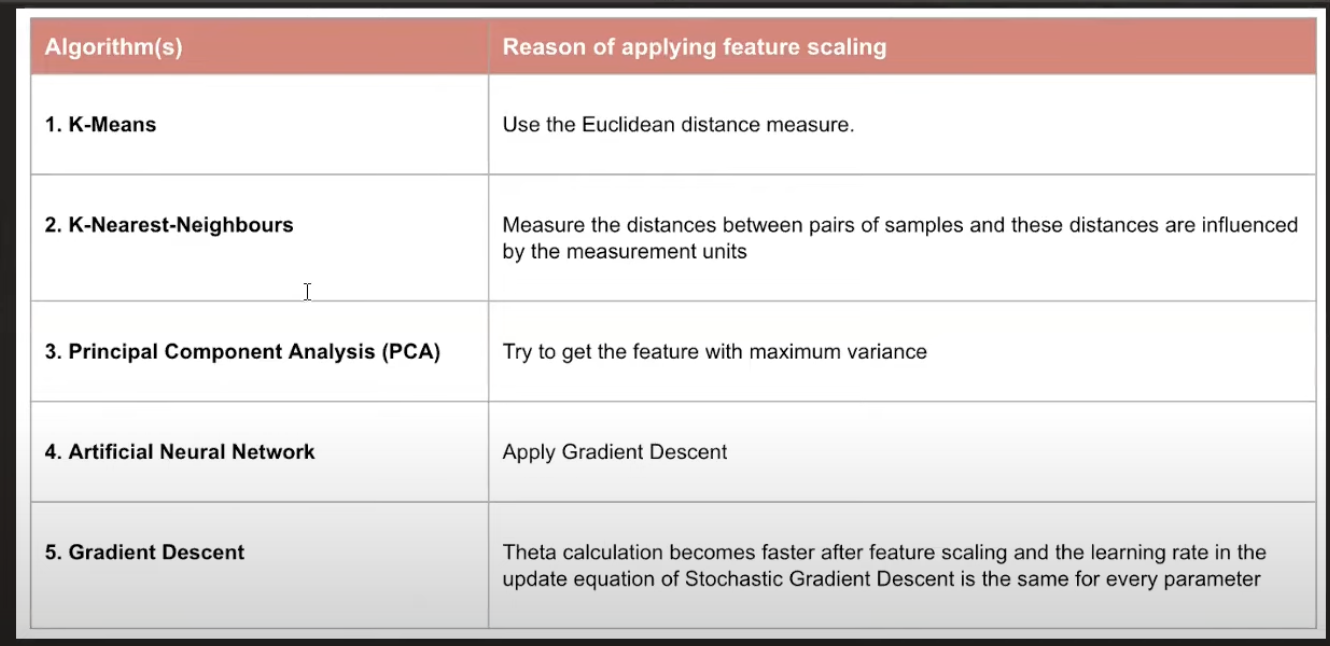